# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell.
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions.

# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (35 points)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more]([Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/))

##  What you need to do
For this task, you are required to build a fully connect feed-forward ANN model
for a classification problem.

For the given data, you need do proper data preprocessing, data analysis,
design the ANN model, then fine-tune your model architecture.

For evaluating your model, do $ 80/20 $ train test split.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Identify the appropriate classification approach for a given problem. 20%
- Apply ANNs to solve a classification problem (basic training, validation, testing -- without fine tuning). 50%
- Fine-tune to determine the optimal model architecture. 20%


### Data
You will be working with the data in `Task_1.csv` for identifying waldo (the user with `user_id=0`) 

The columns include:
 - browser
 - os
 - locale
 - user_id
 - location
 - sites
 - time
 - date

After training, evaluate you model by print [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
on your test set. 

Then predicting each user in `task_1_verify.csv` whether it's Waldo or not. Your output should look like the following:

`row_idx: is_waldo`, notice if the user is waldo your output should be 1

``` 
0: 1
1: 0
2: 0
3: 1
4: 1
...
```



### Analyzing the dataset and preproccessing

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
dataset = pd.read_csv('task 1.csv')
dataset

,index,browser,os,locale,user_id,location,sites,time,date
0,8909,Firefox,Windows 10,zh-CN,46,China/Shanghai,"[{'site': '1.static.dpreview.com', 'length': 1...",14:14:00,2016-01-28
1,17679,Internet Explorer,Windows 8,ro-RO,21,Germany/Berlin,"[{'site': 'safebrowsing-cache.google.com', 'le...",05:23:00,2016-08-26
2,11803,Internet Explorer,MacOS,ur-PK,98,Australia/Sydney,"[{'site': 'www.ncbi.nlm.nih.gov', 'length': 10...",12:03:00,2016-03-13
3,356,Internet Explorer,Ubuntu,pl-PL,44,Japan/Tokyo,"[{'site': 'fr.hdscreen.me', 'length': 16}, {'s...",06:08:00,2017-01-19
4,10948,Internet Explorer,Windows 8,bg-BG,59,Japan/Tokyo,"[{'site': '193.164.196.50', 'length': 10}, {'s...",03:59:00,2017-05-13
...,...,...,...,...,...,...,...,...,...
20396,9076,Safari,Windows 10,es-MX,55,Japan/Tokyo,"[{'site': 's.youtube.com', 'length': 168}, {'s...",05:02:00,2016-08-02
20397,11021,Chrome,Debian,en-US,37,UK/London,"[{'site': 'ajax.googleapis.com', 'length': 122...",22:20:00,2017-01-14
20398,11616,Chrome,Windows 10,ro-RO,175,USA/Chicago,"[{'site': 'blast.ncbi.nlm.nih.gov', 'length': ...",04:06:00,2016-11-05
20399,1863,Firefox,Ubuntu,vi-VN,142,China/Shanghai,"[{'site': 'www.google.fr', 'length': 9}, {'sit...",10:31:00,2016-08-01


In [4]:
print(dataset.shape)
dataset['user_id'].value_counts()

(20401, 9)


0      400
55     131
82     127
148    122
120    121
      ... 
124     84
145     83
170     82
42      82
152     77
Name: user_id, Length: 200, dtype: int64

We can see that only 400 out of the 20401 are waldo. This indicates that the dataset isn't balanced.

In [5]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     20401 non-null  int64 
 1   browser   20401 non-null  object
 2   os        20401 non-null  object
 3   locale    20401 non-null  object
 4   user_id   20401 non-null  int64 
 5   location  20401 non-null  object
 6   sites     20401 non-null  object
 7   time      20401 non-null  object
 8   date      20401 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [6]:
dataset.isnull().sum()

index       0
browser     0
os          0
locale      0
user_id     0
location    0
sites       0
time        0
date        0
dtype: int64

In [7]:
for feature in dataset.columns:
    column = dataset[feature].unique()
    print(feature)
    print(column)
    print(len(column))
    print('---------------------------------------------------')

index
[ 8909 17679 11803 ... 11616  1863 11748]
20401
---------------------------------------------------
browser
['Firefox' 'Internet Explorer' 'Chrome' 'Safari']
4
---------------------------------------------------
os
['Windows 10' 'Windows 8' 'MacOS' 'Ubuntu' 'Debian' 'Windows 7']
6
---------------------------------------------------
locale
['zh-CN' 'ro-RO' 'ur-PK' 'pl-PL' 'bg-BG' 'fr-FR' 'xh-ZA' 'nl-NL' 'en-AU'
 'en-CA' 'en-NZ' 'vi-VN' 'en-US' 'ja-JP' 'wo-SN' 'uk-UA' 'ru_RU' 'pt-BR'
 'pt-PT' 'en-SG' 'de-DE' 'es-MX' 'it-IT' 'en-GB' 'ru-RU']
25
---------------------------------------------------
user_id
[ 46  21  98  44  59  57 122  77 111  62 124 114 112  50 185  31 189 128
  12 167  25 123  33   7 151   5 101 184 169   0 150  52  27 118 116 179
   6  45  91 187 120 127  75  94 119 130 139 121 171 144 133 166  97 129
 176  92  60 132 115 137 149 165  99 175  17  78 160 107 136 191  81  29
  53  20  11  47 163  90  82 170   9  40  84  22  70 147 190 152  87  10
  88 182  26 172  55 

We can see that index is unique for each row, so it's useless and doesn't affect the dataset. Therefore, we can drop it.\
In locale, we have a number of representations for the same lang for example: en in 'en-AU', 'en-CA', 'en-NZ', 'en-SG', 'en-US', and 'en-GB'. We can group them together.
Also, we have different representation of the same locale, for example: 'ru-RU' and 'ru_RU'\
The sites column is a dictionary for each row and each entry in it consists of a site (string) and length (int). It needs special preprocessing, for example sequential encoding then PCA. For now, I will assume that it won't affect the results much and drop it. If the model needs higher accuracy, we can come back to this assumtion and update it.

In [8]:
def dropping(dataset):
    dataset = dataset.drop(['sites', 'index'], axis=1)
    return dataset

In [9]:
def adjusting_target(dataset):
    dataset['user_id'] = (1 - (dataset['user_id'] == 0))
    X = dataset.drop(['user_id'], axis = 1)
    y = dataset.loc[:,'user_id']
    return X, y

In [10]:
def ohe_new_features(dataset):
    dataset = pd.get_dummies(dataset, columns=['browser', 'os', 'locale', 'location'])
    return dataset


In [11]:
def time_encoding(dataset):
    time_str = dataset['time'].astype(str)

    # Convert the time string to datetime format
    time_dt = pd.to_datetime(time_str, format='%H:%M:%S')

    # Extract the hour, minute, and second components
    hour = time_dt.dt.hour
    minute = time_dt.dt.minute
    second = time_dt.dt.second

    # Encode the hour, minute, and second as cyclic features using sine and cosine functions
    dataset['hour_sin'] = np.sin(2*np.pi*hour/24)
    dataset['hour_cos'] = np.cos(2*np.pi*hour/24)
    dataset['minute_sin'] = np.sin(2*np.pi*minute/60)
    dataset['minute_cos'] = np.cos(2*np.pi*minute/60)
    dataset['second_sin'] = np.sin(2*np.pi*second/60)
    dataset['second_cos'] = np.cos(2*np.pi*second/60)
    dataset = dataset.drop('time', axis=1)
    return dataset


In [12]:
def date_encoding(dataset):
    dataset['date'] = pd.to_datetime(dataset['date'])

    # Extract the year, month, and day components
    dataset['year'] = dataset['date'].dt.year
    dataset['month'] = dataset['date'].dt.month
    dataset['day'] = dataset['date'].dt.day

    # Encode the year, month, and day as cyclic features using sine and cosine functions
    dataset['year_sin'] = np.sin(2 * np.pi * dataset['year'] / 365.25)
    dataset['year_cos'] = np.cos(2 * np.pi * dataset['year'] / 365.25)
    dataset['month_sin'] = np.sin(2 * np.pi * dataset['month'] / 12)
    dataset['month_cos'] = np.cos(2 * np.pi * dataset['month'] / 12)
    dataset['day_sin'] = np.sin(2 * np.pi * dataset['day'] / 31)
    dataset['day_cos'] = np.cos(2 * np.pi * dataset['day'] / 31)

    # Drop the original year, month, and day columns
    dataset = dataset.drop(['year', 'month', 'day', 'date'], axis=1)
    return dataset

In [13]:
def group_locale(dataset):
    dataset['locale'] = dataset['locale'].str.split('_').str[0].str.split('-').str[0]
    return dataset

In [14]:
def preprocessing(X):
    X = dropping(X)
    X = group_locale(X)
    X = ohe_new_features(X)
    X = time_encoding(X)
    X = date_encoding(X)
    
    return X


In [15]:
from sklearn.model_selection import train_test_split
X, y = adjusting_target(dataset)
X = preprocessing(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
print(X_train['second_cos'].unique())
print(X_train['second_sin'].unique())


[1.]
[0.]


In [17]:
X_train = X_train.drop(['second_cos', 'second_sin'], axis=1)
X_test = X_test.drop(['second_cos', 'second_sin'], axis=1)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16320 entries, 8936 to 11916
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   browser_Chrome                  16320 non-null  uint8  
 1   browser_Firefox                 16320 non-null  uint8  
 2   browser_Internet Explorer       16320 non-null  uint8  
 3   browser_Safari                  16320 non-null  uint8  
 4   os_Debian                       16320 non-null  uint8  
 5   os_MacOS                        16320 non-null  uint8  
 6   os_Ubuntu                       16320 non-null  uint8  
 7   os_Windows 10                   16320 non-null  uint8  
 8   os_Windows 7                    16320 non-null  uint8  
 9   os_Windows 8                    16320 non-null  uint8  
 10  locale_bg                       16320 non-null  uint8  
 11  locale_de                       16320 non-null  uint8  
 12  locale_en                    

In [19]:
X_train.shape

(16320, 59)

### ANN Model

In [20]:
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(59,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_score = model.evaluate(X_test, y_test)
print('Test score:', test_score)


2023-04-16 23:01:20.838274: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 23:01:21.027158: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-16 23:01:21.031576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 23:01:22.248973: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/20
510/510 [==============================] - 2s 3ms/step - loss: 0.0417 - accuracy: 0.9881 - val_loss: 0.0068 - val_accuracy: 0.9978
Epoch 2/20
510/510 [==============================] - 1s 2ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0063 - val_accuracy: 0.9975
Epoch 3/20
510/510 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.0059 - val_accuracy: 0.9983
Epoch 4/20
510/510 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0050 - val_accuracy: 0.9973
Epoch 5/20
510/510 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0054 - val_accuracy: 0.9975
Epoch 6/20
510/510 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0055 - val_accuracy: 0.9978
Epoch 7/20
510/510 [==============================] - 1s 2ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9985
Epoch 

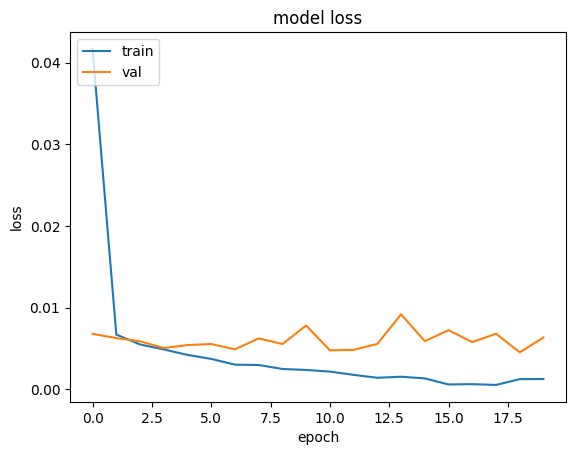

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Verify

In [22]:
verify_dataset = pd.read_csv('task_1_verify.csv')
verify_dataset


,browser,os,locale,location,sites,time,date
0,Firefox,Windows 7,xh-ZA,USA/New York,"[{'site': 'rr.office.microsoft.com', 'length':...",11:30:00,2016-10-05
1,Chrome,Windows 10,pl-PL,Japan/Tokyo,"[{'site': 'maps.google.com', 'length': 14}, {'...",14:35:00,2016-05-06
2,Firefox,Debian,vi-VN,France/Paris,"[{'site': 'cbk1.googleapis.com', 'length': 178...",14:31:00,2016-03-27
3,Firefox,Debian,en-US,Canada/Vancouver,"[{'site': 'annotathon.org', 'length': 72}, {'s...",10:55:00,2016-12-31
4,Firefox,Debian,en-CA,Australia/Sydney,"[{'site': 'apis.google.com', 'length': 75}, {'...",03:30:00,2017-01-19
5,Firefox,Windows 10,en-AU,UK/London,"[{'site': 'plus.google.com', 'length': 125}, {...",10:06:00,2016-02-20
6,Safari,Windows 8,ru-RU,Canada/Toronto,"[{'site': 'translate.google.com', 'length': 88...",13:05:00,2017-07-25
7,Firefox,Debian,nl-NL,Germany/Berlin,"[{'site': 'apis.google.com', 'length': 89}, {'...",02:16:00,2017-02-27
8,Chrome,Windows 10,nl-NL,Australia/Sydney,"[{'site': 'cbks0.google.com', 'length': 92}, {...",21:13:00,2016-07-31
9,Firefox,Windows 7,xh-ZA,New Zealand/Auckland,"[{'site': 'ec.gc.ca', 'length': 25}, {'site': ...",10:59:00,2016-07-12


In [23]:
X = verify_dataset.drop('sites', axis=1)
X = group_locale(X)
X = ohe_new_features(X)
X = time_encoding(X)
X = date_encoding(X)
X = X.drop(['second_cos', 'second_sin'], axis=1)


In [24]:
train_cols = list(X_train.columns)
test_cols = list(X.columns)
cols_not_in_test = {c:0 for c in train_cols if c not in test_cols}
X = X.assign(**cols_not_in_test)


,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,...,locale_bg,locale_es,locale_it,locale_ja,locale_ro,locale_wo,location_Malaysia/Kuala Lumpur,location_Singapore/Singapore,location_USA/Miami,location_USA/San Francisco
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_pred = model.predict(X)
y_pred

### Questions
1. Did you find any usefull insights from your data analysis?
    - The number of appearances of waldo in the dataset is 400 times out of 20401 times, which clearly states that the dataset isn't balanced.
    We can see that index is unique for each row, so it's useless and doesn't affect the dataset. Therefore, we can drop it.\
In locale, we have a number of representations for the same lang for example: en in 'en-AU', 'en-CA', 'en-NZ', 'en-SG', 'en-US', and 'en-GB'. We can group them together.
Also, we have different representation of the same locale, for example: 'ru-RU' and 'ru_RU'
The sites column is a dictionary for each row and each entry in it consists of a site (string) and length (int). It needs special preprocessing, for example sequential encoding then PCA.
2. What preprocessing techniques did you use? Why?
    - First, I separated the dataset into features (X) and target (y) while adjusting the target to have binary classification problem where 1 is the value when we find waldo and 0 otherwise.\ Second, I dropped the columns of features that are not affecting the target (according to the assumptions stated in data analysis).\ Third, I grouped and cleaned the locale column feature to get rid of the repetitive values.\ Fourth, I applied one hot encoding to the categorical features.\ Fifth, I applied cyclic encoding technique to time and date as they are periodic features.\ Sixth, I splitted the dataset into training and testing.\ Lastly, I dropped 2 more columns ('second_cos', 'second_sin') cause they are the same across all the rows meaning they are not affecting the target value.\
3. Describe the fine-tuning process and how you reached your model architecture.
    - I have fine-tuned the model manually by changing the activation functions, optimizer, and learning rates. This is the best model I have reached.
4. Which metric did you try to optemize for this task? Why?
    - I used f1-score to optimize this task as I see that it's the most appropriate metric for evaluating imbalanced binary classification models as it is the harmonic mean between precision and recall, making it more easier to evaluate the performance of a model.

# Task 2: Fingerprint Recognition (50 points)
Fingerprint recognition is a highly accurate and reliable biometric technology that is used for identification and authentication purposes. By analyzing the unique patterns and ridges on an individual's fingerprint, it is possible to verify their identity with a high degree of confidence. This technology is widely used in law enforcement, border control, and access control systems, as well as in mobile devices and payment systems, to ensure secure and reliable identification and authentication.

In this task you will be doing a simplified version of Fingerprint ID, which is just identifying which finger is used in the image

## What you need to do

For this task, you will be doing image classification:
- Build a CNN model for image classification.
- Estimate the speed of inference of your model

For the given data, you need to do proper data preprocessing, augmentation, and data loaders.

Then fine-tune your model architecture to achieve the highest accuracy.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Use literature (any paper on the use of CNN for fingerprinting and cite it) to choose an architecture. 10%
- Apply CNNs to solve an image classification problem (basic training, validation, testing -- without fine tuning). 40%
- Fine-tune your model to improve performance. 20%
- Use of data augmentation to improve model’s performance. 20%
- Explore beyond data augmentation find techniques to improve model’s performance and use them. 15%(bonus)


### Data
[Download link](https://drive.google.com/file/d/1iMIdYKSmCjVL5p-yzy-oInLMtTVt-1_j/view?usp=share_link)

You will be working with the data in `task_2.zip` for identifying. The name of each image consists of 2 parts like
`idx_label.BMB`

Where the idx is the index of the image and the label is the target class.

Each label corresponds to a finger:
```
0-> left_thumb
1-> left_index
2-> left_middle
3-> left_ring
4-> left_little
5-> right_thumb
6-> right_index
7-> right_middle
8-> right_ring
9-> right_little
```

In [26]:
import os
import matplotlib.pyplot as plt


In [27]:
from PIL import Image


In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [32]:
train_dir = 'task 2/train'
test_dir = 'task 2/test'
img_width = 64
img_height = 64
batch_size = 32
num_epochs = 20


In [33]:
train_datagen = ImageDataGenerator(
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    shear_range=0.1, 
    zoom_range=0.1,  
    horizontal_flip=True, 
    vertical_flip=False,  
    rescale=1./255 
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [34]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')


Found 19413 images belonging to 10 classes.
Found 19413 images belonging to 10 classes.
Found 14272 images belonging to 10 classes.


In [35]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)       

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
        train_generator,
        epochs=num_epochs,
        validation_data=validation_generator)


Epoch 1/20


2023-04-16 18:49:48.368763: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


607/607 [==============================] - ETA: 0s - loss: 2.0189 - accuracy: 0.2522

2023-04-16 18:50:46.431066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


607/607 [==============================] - 69s 110ms/step - loss: 2.0189 - accuracy: 0.2522 - val_loss: 2.0965 - val_accuracy: 0.2297
Epoch 2/20
607/607 [==============================] - 66s 109ms/step - loss: 1.9397 - accuracy: 0.2795 - val_loss: 1.9290 - val_accuracy: 0.2817
Epoch 3/20
607/607 [==============================] - 61s 101ms/step - loss: 1.8917 - accuracy: 0.2944 - val_loss: 1.8080 - val_accuracy: 0.3179
Epoch 4/20
607/607 [==============================] - 65s 107ms/step - loss: 1.8464 - accuracy: 0.3184 - val_loss: 1.8435 - val_accuracy: 0.3133
Epoch 5/20
607/607 [==============================] - 61s 101ms/step - loss: 1.8296 - accuracy: 0.3210 - val_loss: 1.9906 - val_accuracy: 0.3026
Epoch 6/20
607/607 [==============================] - 62s 102ms/step - loss: 1.8080 - accuracy: 0.3320 - val_loss: 2.0274 - val_accuracy: 0.2952
Epoch 7/20
607/607 [==============================] - 66s 108ms/step - loss: 1.7942 - accuracy: 0.3384 - val_loss: 2.0692 - val_accuracy: 0.2

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
        train_generator,
        epochs=30,
        validation_data=validation_generator)


Epoch 1/30


2023-04-16 19:21:47.272338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


607/607 [==============================] - ETA: 0s - loss: 1.5770 - accuracy: 0.4348

2023-04-16 19:22:37.503898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


607/607 [==============================] - 60s 97ms/step - loss: 1.5770 - accuracy: 0.4348 - val_loss: 2.7991 - val_accuracy: 0.2991
Epoch 2/30
607/607 [==============================] - 59s 98ms/step - loss: 1.5864 - accuracy: 0.4307 - val_loss: 2.3844 - val_accuracy: 0.3020
Epoch 3/30
607/607 [==============================] - 59s 98ms/step - loss: 1.5813 - accuracy: 0.4371 - val_loss: 3.2448 - val_accuracy: 0.2681
Epoch 4/30
607/607 [==============================] - 60s 98ms/step - loss: 1.5629 - accuracy: 0.4401 - val_loss: 2.1107 - val_accuracy: 0.3419
Epoch 5/30
607/607 [==============================] - 59s 98ms/step - loss: 1.5644 - accuracy: 0.4371 - val_loss: 2.0607 - val_accuracy: 0.3444
Epoch 6/30
607/607 [==============================] - 60s 98ms/step - loss: 1.5494 - accuracy: 0.4480 - val_loss: 2.5978 - val_accuracy: 0.2933
Epoch 7/30
607/607 [==============================] - 60s 98ms/step - loss: 1.5483 - accuracy: 0.4470 - val_loss: 2.1938 - val_accuracy: 0.3017
Epo

In [30]:
test_loss, test_acc = model.evaluate(test_generator)

print('Test accuracy:', test_acc)


  7/446 [..............................] - ETA: 8s - loss: 1.7745 - accuracy: 0.4196

2023-04-16 20:04:09.758241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


446/446 [==============================] - 8s 17ms/step - loss: 2.0074 - accuracy: 0.3697
Test accuracy: 0.3697449564933777


### Questions
1. What preprocessing techniques did you use? Why?
    - I manually distributed the images in classes in both train and test directories. Then, renamed the files in the test directory to have the extension '.bmp' to be accepted by the model.
2. What data augmentation techniques did you use?
    - I used:
    - rotation
    - shifting in both horizontal and vertical directions
    - shearing and zooming
    - horizontal flips but not vertical ones
    - rescaling
3. Describe the fine-tuning process and how you reached your final CNN model.
    - I tried fine-tuning manually by changing the number of layers, optimizers (adam, SGD), kernel size, and dropout till I reached this final model.
4. What techniques did you use to improve model’s performance other than data augmentation
    - manually fine-tuning the model.

# Task 3: Credit approval (15 points)

Credit approval is necessary to assess an individual's creditworthiness and determine their eligibility for loans, credit cards, and other financial products. It helps lenders to evaluate the borrower's ability to repay the loan, their credit history, and other financial obligations.
Credit approval is important for both lenders and borrowers because it enables lenders to manage their risk and make informed lending decisions while ensuring that borrowers can obtain financing on fair and reasonable terms.

In many credit approval applications, it is crucial for the model to be interpretable. This means that the model's inner workings and decision-making process can be easily understood and explained by humans. An interpretable model can help to build trust in the model's output, provide transparency in the decision-making process, and enable regulators to monitor and audit the model's performance. 

## What you need to do

For the `loan_data.csv` data, predict if the bank should give a loan or not.

- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Learning Objectives

- Apply DTs, and RFs to solve a classification problem (basic training, validation, testing. 50%
- Fine-tune to determine the optimal model architecture. 20%
- Evaluate and compare the performance of different models. 10%
- Visualise the models. 20%


### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [49]:
dataset = pd.read_csv('loan_data.csv')
dataset

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [51]:
dataset['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [52]:
dataset = pd.get_dummies(dataset, columns=['purpose'])

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [54]:
X, y = dataset.drop(columns=['credit.policy']), dataset['credit.policy']
y.value_counts()
#the dataset is not balanced (Class '0': less than 20% of the dataset)

1    7710
0    1868
Name: credit.policy, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
1309,0.1128,218.60,11.184421,16.86,697,2208.000000,21659,49.9,1,0,0,1,0,1,0,0,0,0,0
335,0.1141,329.34,11.270905,14.03,692,4470.041667,8473,27.6,3,1,1,0,0,0,1,0,0,0,0
5961,0.1461,517.13,11.957611,7.83,682,5730.000000,6618,30.5,2,0,0,0,0,0,0,0,1,0,0
8368,0.0976,241.16,11.338572,7.03,737,2580.000000,37241,14.8,6,0,0,1,0,0,1,0,0,0,0
2348,0.1379,545.21,11.289782,10.95,702,3420.041667,13742,64.5,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6478,0.1253,33.47,9.862666,1.25,692,2970.000000,379,15.8,1,0,0,0,1,0,0,0,0,0,0
5965,0.1183,828.35,11.884468,5.54,777,10290.041670,311,0.4,1,0,0,0,0,0,0,0,1,0,0
3583,0.1379,340.76,10.518673,18.16,682,6659.958333,17473,47.9,0,0,0,0,0,0,1,0,0,0,0
1807,0.1347,254.42,10.373616,21.30,692,2252.041667,14629,93.8,1,0,0,0,1,0,0,0,0,0,0


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score


In [57]:
def metrics(y_actual, y_pred):
    acc_dt = accuracy_score(y_actual, y_pred)
    prec_dt = precision_score(y_actual, y_pred)
    rec_dt = recall_score(y_actual, y_pred)
    f1_dt = f1_score(y_actual, y_pred)
    print(f"Accuracy: {acc_dt:.2f}, Precision: {prec_dt:.2f}, Recall: {rec_dt:.2f}, F1-score: {f1_dt:.2f}")


In [58]:
X_train, X_valtest, y_train, y_valtest = train_test_split(dataset.drop('credit.policy', axis=1), dataset['credit.policy'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)


In [75]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_val_pred_dt = dt_clf.predict(X_val)
print("Decision Tree:")
metrics(y_val, y_val_pred_dt)
dt_clf.tree_.max_depth

Decision Tree:
Accuracy: 1.00, Precision: 0.99, Recall: 1.00, F1-score: 1.00


16

In [77]:
from sklearn.model_selection import RandomizedSearchCV as RSCV

param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
rf_clf = model.best_estimator_

In [81]:
rf_clf = RandomForestClassifier(random_state=0, oob_score=True, n_estimators=15, max_depth=7)
rf_clf.fit(X_train, y_train)
y_val_pred_rf = rf_clf.predict(X_val)
print("Random Forest:")
metrics(y_val, y_val_pred_rf)
rf_clf.max_depth

Random Forest:
Accuracy: 0.95, Precision: 0.95, Recall: 0.99, F1-score: 0.97


/home/roukaya/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


7

### Questions
1. How did the DT compare to the RF in performance? Why?
    - The DT outperformed the RF but that maybe because the DT tended to overfit.
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
    - The depth of the DT is higher than the RF. This is because increasing the depth of the decision tree can lead to better performance on the training data, but it can also increase overfitting and decrease generalization. In contrast, random forests can capture the nonlinear relationships and interactions among features without becoming too complex or overfitting.\
3. What is ensemble learning? What are its pros and cons?
    - Ensemble learning is a machine learning technique that integrates various models or algorithms to increase the performance and accuracy of prediction. Comparing ensemble learning to single models, the advantages are less overfitting, increased robustness, and improved accuracy. However, compared to individual models, ensemble learning can also be more computationally expensive and confusing to interpret.\
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
Which of these categories does RF fall under?
    - Bagging and boosting are two common types of ensemble learning methods. Bagging involves training multiple independent models on different subsets of the data and averaging their predictions, while boosting involves training multiple models sequentially, with each subsequent model attempting to correct the errors of the previous model. Two types of bagging methods are random forests and bootstrap aggregating (or bagging) of decision trees. Two types of boosting methods are AdaBoost and gradient boosting. Random forests fall under the bagging category because they use bootstrap aggregating to train multiple decision trees on random subsets of the data.